In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
cd /content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes

/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes


# Converting YOLO format of Labelled images to COCO format

In [2]:
import os
import json
import cv2
import random
import time

In [3]:
#### This is where the conversion process starts from YOLO to COCO format

# Category file, one category per line
yolo_format_classes_path = "/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/YOLO_full_new_tick_data/obj.names"
# Write the category according to your own data set. 

#Read the categories file and extract all categories
with open(yolo_format_classes_path,'r') as f1:
    lines1 = f1.readlines()
categories = []
for j,label in enumerate(lines1):
    label = label.strip()
    categories.append({'id':j+1,'name':label,'supercategory': label})
    
write_json_context = dict()
write_json_context['info'] = {'description': '', 'url': '', 'version': '', 'year': 2021, 'contributor': '', 'date_created': '2021-02-12 11:00:08.5'}
write_json_context['licenses'] = [{'id': 1, 'name': None, 'url': None}]
write_json_context['categories'] = categories
write_json_context['images'] = []
write_json_context['annotations'] = []

## train.json

In [7]:
# Read the YOLO formatted label files (.txt) to extarct bounding box information and store in COCO format

#Read the label files (.txt) to extarct bounding box information and store in COCO format
directory_labels = os.fsencode("/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/YOLO_full_new_tick_data/labels/train")
directory_images = os.fsencode("/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/YOLO_full_new_tick_data/images/train")

file_number = 1
num_bboxes = 1
for file in os.listdir(directory_images):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        img_path = (os.path.join(directory_images.decode("utf-8"), filename))
        base=os.path.basename(img_path)
        file_name_without_ext = os.path.splitext(base)[0] # name of the file without the extension
        yolo_annotation_path  = os.path.join(directory_labels.decode("utf-8"), file_name_without_ext+ "." + 'txt')
        img_name = os.path.basename(img_path) # name of the file without the extension
        img_context = {}
        height,width = cv2.imread(img_path).shape[:2]
        img_context['file_name'] = img_name
        img_context['height'] = height
        img_context['width'] = width
        img_context['date_captured'] = '2021-02-12 11:00:08.5'
        img_context['id'] = file_number # image id
        img_context['license'] = 1
        img_context['coco_url'] =''
        img_context['flickr_url'] = ''
        write_json_context['images'].append(img_context)
        
        with open(yolo_annotation_path,'r') as f2:
            lines2 = f2.readlines() 

        for i,line in enumerate(lines2): # for loop runs for number of annotations labelled in an image
            line = line.split(' ')
            bbox_dict = {}
            class_id, x_yolo,y_yolo,width_yolo,height_yolo= line[0:]
            x_yolo,y_yolo,width_yolo,height_yolo,class_id= float(x_yolo),float(y_yolo),float(width_yolo),float(height_yolo),int(class_id)
            bbox_dict['id'] = num_bboxes
            bbox_dict['image_id'] = file_number
            bbox_dict['category_id'] = class_id+1
            bbox_dict['iscrowd'] = 0 # There is an explanation before
            h,w = abs(height_yolo*height),abs(width_yolo*width)
            bbox_dict['area']  = h * w
            x_coco = round(x_yolo*width -(w/2))
            y_coco = round(y_yolo*height -(h/2))
            if x_coco <0: #check if x_coco extends out of the image boundaries
                x_coco = 1
            if y_coco <0: #check if y_coco extends out of the image boundaries
                y_coco = 1
            bbox_dict['bbox'] = [x_coco,y_coco,w,h]
            bbox_dict['segmentation'] = [[x_coco,y_coco,x_coco+w,y_coco, x_coco+w, y_coco+h, x_coco, y_coco+h]]
            write_json_context['annotations'].append(bbox_dict)
            num_bboxes+=1
        
        file_number = file_number+1
        continue
    else:
        continue
        
 # Finally done, save!

coco_format_save_path = '/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/train.json'
with open(coco_format_save_path,'w') as fw:
    json.dump(write_json_context,fw)

val.json

In [4]:
# Read the YOLO formatted label files (.txt) to extarct bounding box information and store in COCO format

#Read the label files (.txt) to extarct bounding box information and store in COCO format
directory_labels = os.fsencode("/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/YOLO_full_new_tick_data/labels/test")
directory_images = os.fsencode("/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/YOLO_full_new_tick_data/images/test")

file_number = 1
num_bboxes = 1
for file in os.listdir(directory_images):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        img_path = (os.path.join(directory_images.decode("utf-8"), filename))
        base=os.path.basename(img_path)
        file_name_without_ext = os.path.splitext(base)[0] # name of the file without the extension
        yolo_annotation_path  = os.path.join(directory_labels.decode("utf-8"), file_name_without_ext+ "." + 'txt')
        img_name = os.path.basename(img_path) # name of the file without the extension
        img_context = {}
        height,width = cv2.imread(img_path).shape[:2]
        img_context['file_name'] = img_name
        img_context['height'] = height
        img_context['width'] = width
        img_context['date_captured'] = '2021-02-12 11:00:08.5'
        img_context['id'] = file_number # image id
        img_context['license'] = 1
        img_context['coco_url'] =''
        img_context['flickr_url'] = ''
        write_json_context['images'].append(img_context)
        
        with open(yolo_annotation_path,'r') as f2:
            lines2 = f2.readlines() 

        for i,line in enumerate(lines2): # for loop runs for number of annotations labelled in an image
            line = line.split(' ')
            bbox_dict = {}
            class_id, x_yolo,y_yolo,width_yolo,height_yolo= line[0:]
            x_yolo,y_yolo,width_yolo,height_yolo,class_id= float(x_yolo),float(y_yolo),float(width_yolo),float(height_yolo),int(class_id)
            bbox_dict['id'] = num_bboxes
            bbox_dict['image_id'] = file_number
            bbox_dict['category_id'] = class_id+1
            bbox_dict['iscrowd'] = 0 # There is an explanation before
            h,w = abs(height_yolo*height),abs(width_yolo*width)
            bbox_dict['area']  = h * w
            x_coco = round(x_yolo*width -(w/2))
            y_coco = round(y_yolo*height -(h/2))
            if x_coco <0: #check if x_coco extends out of the image boundaries
                x_coco = 1
            if y_coco <0: #check if y_coco extends out of the image boundaries
                y_coco = 1
            bbox_dict['bbox'] = [x_coco,y_coco,w,h]
            bbox_dict['segmentation'] = [[x_coco,y_coco,x_coco+w,y_coco, x_coco+w, y_coco+h, x_coco, y_coco+h]]
            write_json_context['annotations'].append(bbox_dict)
            num_bboxes+=1
        
        file_number = file_number+1
        continue
    else:
        continue
        
 # Finally done, save!

coco_format_save_path = '/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/val.json'
with open(coco_format_save_path,'w') as fw:
    json.dump(write_json_context,fw)

# DERT

Use PyTorch version 1.7

In [5]:
!pip install torch==1.7.0 torchvision==0.8.0 torchaudio==0.7.0

     |████████████████████████████████| 776.7 MB 4.5 kB/s 
     |████████████████████████████████| 11.8 MB 26.7 MB/s 
     |████████████████████████████████| 7.6 MB 22.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.0 which is incompatible.


In [6]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

torch.set_grad_enabled(False);

1.7.0 True


Clone DETR Repo

In [7]:
!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 250, done.
remote: Total 250 (delta 0), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (250/250), 12.84 MiB | 19.42 MiB/s, done.
Resolving deltas: 100% (135/135), done.


## Define useful boilerplate functions

In [8]:
import torchvision.transforms as T

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [9]:
def filter_bboxes_from_outputs(outputs,
                               threshold=0.7):
  
  # keep only predictions with confidence above threshold
  probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
  keep = probas.max(-1).values > threshold

  probas_to_keep = probas[keep]

  # convert boxes from [0; 1] to image scales
  bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)
  
  return probas_to_keep, bboxes_scaled

In [10]:
# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [11]:
import matplotlib.pyplot as plt

def plot_results(pil_img, prob=None, boxes=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    if prob is not None and boxes is not None:
      for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=c, linewidth=3))
          cl = p.argmax()
          text = f'{CLASSES[cl]}: {p[cl]:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

## Clone custom code of DETR

Clone [fork](https://github.com/woctezuma/detr/tree/finetune) tailored for a custom dataset:
-   called `custom`,
-   with `max_class_id = 5` ([explanation](https://github.com/facebookresearch/detr/issues/108#issuecomment-650269223)).

**Caveat**: if you later use `first_class_index = 1` for your dataset, then it is fine. However, if you later use `first_class_index = 0`, then you will have to override the value of `max_class_id` (so that it is equal to 1) when calling `!python main.py`. 


In [12]:
%cd /content/

!rm -rf detr
!git clone https://github.com/woctezuma/detr.git

%cd detr/

!git checkout finetune

/content
Cloning into 'detr'...
remote: Enumerating objects: 239, done.
remote: Total 239 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (239/239), 284.62 KiB | 21.89 MiB/s, done.
Resolving deltas: 100% (131/131), done.
/content/detr
Branch 'finetune' set up to track remote branch 'finetune' from 'origin'.
Switched to a new branch 'finetune'


## Load pre-trained weights

Load a check-point (urls can be found [here](https://github.com/facebookresearch/detr#model-zoo)), then remove the classification head.

In [13]:
# Get pretrained weights
checkpoint = torch.hub.load_state_dict_from_url(
            url='https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth',
            map_location='cpu',
            check_hash=True)

# Remove class weights
del checkpoint["model"]["class_embed.weight"]
del checkpoint["model"]["class_embed.bias"]

# Save
torch.save(checkpoint,
           'detr-r50_no-class-head.pth')

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


  0%|          | 0.00/159M [00:00<?, ?B/s]

# Prepare the dataset for fine-tuning

You can choose whether to start indexing categories with 0 or with 1.

This is a matter of taste, and it should not impact the performance of the algorithm.

In [14]:
# Choose whether to start indexing categories with 0 or with 1.
#
# NB: convention in COCO dataset is such that the 1st class (person) has ID n°1.
#
# NB²: this is why we chose to set to 1 the default value of `first_class_index`
# in `via2coco.convert()`.

first_class_index = 1

We expect the directory structure to be the following:
```
path/to/coco/
├ annotations/  # JSON annotations
│  ├ annotations/custom_train.json
│  └ annotations/custom_val.json
├ train2017/    # training images
└ val2017       # validation images
```
You can move the files in drive accordingly.

## Check the dataset after it was pre-processed for fine-tuning

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:
-   Demo of COCO API: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [15]:
%matplotlib inline
import pycocotools.coco as coco
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [18]:
dataDir='/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/custom/'
dataType='train2017'
annFile='{}annotations/custom_train.json'.format(dataDir)

In [19]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [20]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

nms=[cat['name'] for cat in cats]
print('Categories: {}'.format(nms))

nms = set([cat['supercategory'] for cat in cats])
print('Super-categories: {}'.format(nms))

Categories: ['dromedarii_female', 'dromedarii_male', 'scupense_female', 'scupense_male', 'impeltatum_female', 'impeltatum_male', 'marginatum_female', 'marginatum_male', 'other_female', 'other_male', 'excavatum']
Super-categories: {'excavatum', 'marginatum_female', 'marginatum_male', 'dromedarii_female', 'scupense_male', 'impeltatum_male', 'other_male', 'other_female', 'impeltatum_female', 'dromedarii_male', 'scupense_female'}


In [21]:
# load and display image
catIds = coco.getCatIds(catNms=['DM (1)']);
imgIds = coco.getImgIds(catIds=catIds );

Image n°192
Image name: /content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/custom//train2017/DM_val (11).jpg


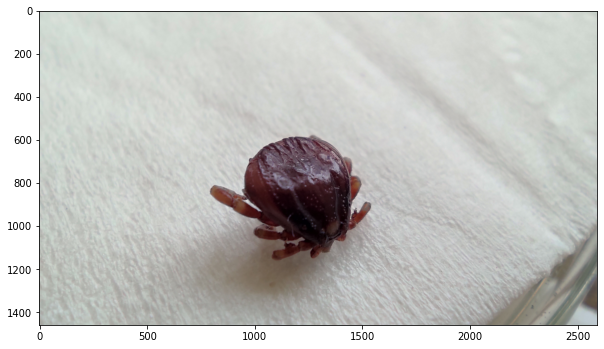

In [22]:
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image n°{}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = '%s/%s/%s'%(dataDir, dataType, img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)

In [23]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

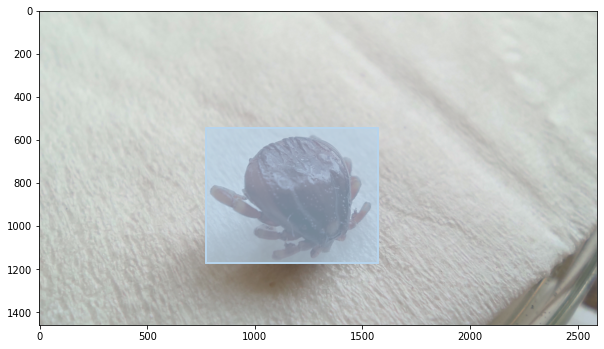

In [24]:
# load and display instance annotations
plt.imshow(I)
coco.showAnns(anns, draw_bbox=True)

## Fine-tuning

-   Instructions appear in [a Github Gist](https://gist.github.com/woctezuma/e9f8f9fe1737987351582e9441c46b5d).

NB: There is a `--frozen_weights` argument. However,
i) I have yet to figure out how it is used,
ii) it is of no use for box detection. Indeed, "frozen training is meant for segmentation only" (as mentioned at this [line](https://github.com/facebookresearch/detr/blob/f4cdc542de34de771da8b9189742e5465f5220cd/main.py#L110) of the source-code).

### Boilerplate variables

**Caveat**: the parameter name `num_classes` is misleading. It is actually the ID which DETR will reserve for **its own** `no_object` class.

It should be set to one plus the highest class ID in your dataset.

For instance, if you have one class (balloon):
- if you used the index n°0 for this class, then `max_id = 0` and `num_classes = max_id+1 = 1`
- if you used the index n°1 for this class, then `max_id = 1` and `num_classes = max_id+1 = 2`

Reference: https://github.com/facebookresearch/detr/issues/108#issuecomment-650269223

In [25]:
assert(first_class_index in [0, 1])

if first_class_index == 0:

  # There is one class, balloon, with ID n°0.

  num_classes = 11

  finetuned_classes = [
      'dromedarii_female', 'dromedarii_male', 'scupense_female', 'scupense_male', 'impeltatum_female', 'impeltatum_male', 'marginatum_female', 'marginatum_male', 'other_female', 'other_male', 'excavatum'
  ]

  # The `no_object` class will be automatically reserved by DETR with ID equal
  # to `num_classes`, so ID n°1 here.  

else:

  # There is one class, balloon, with ID n°1.
  #
  # However, DETR assumes that indexing starts with 0, as in computer science,
  # so there is a dummy class with ID n°0.
  # Caveat: this dummy class is not the `no_object` class reserved by DETR.

  num_classes = 12

  finetuned_classes = [
      'N/A', 'dromedarii_female', 'dromedarii_male', 'scupense_female', 'scupense_male', 'impeltatum_female', 'impeltatum_male', 'marginatum_female', 'marginatum_male', 'other_female', 'other_male', 'excavatum'
  ]

  # The `no_object` class will be automatically reserved by DETR with ID equal
  # to `num_classes`, so ID n°2 here.

print('First class index: {}'.format(first_class_index))  
print('Parameter num_classes: {}'.format(num_classes))
print('Fine-tuned classes: {}'.format(finetuned_classes))

First class index: 1
Parameter num_classes: 12
Fine-tuned classes: ['N/A', 'dromedarii_female', 'dromedarii_male', 'scupense_female', 'scupense_male', 'impeltatum_female', 'impeltatum_male', 'marginatum_female', 'marginatum_male', 'other_female', 'other_male', 'excavatum']


In [29]:
%cd /content/detr

/content/detr


**Caveat**: below, we override the value of `num_classes` (hard-coded to 5 for the `custom` dataset in my `finetune` branch of DETR) in case `first_class_index = 0` instead of `first_class_index = 1` (default value).

In [30]:
!python main.py \
  --dataset_file "custom" \
  --coco_path "/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/custom" \
  --output_dir "/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/output" \
  --resume "detr-r50_no-class-head.pth" \
  --num_classes $num_classes \
  --epochs 100

Output hidden; open in https://colab.research.google.com to view.

## Check the results

### Monitoring of training

Reference: https://github.com/lessw2020/Thunder-Detr/blob/master/View_your_training_results.ipynb

In [33]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path("/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/output/")]

As mentioned in the code of [`plot_logs`](https://github.com/facebookresearch/detr/blob/5e66b4cd15b2b182da347103dd16578d28b49d69/util/plot_utils.py#L13):
-   solid lines are training results,
-   dashed lines are validation results.

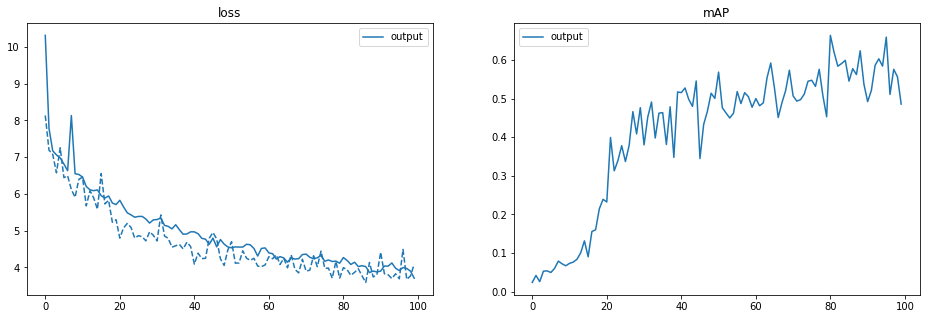

In [34]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

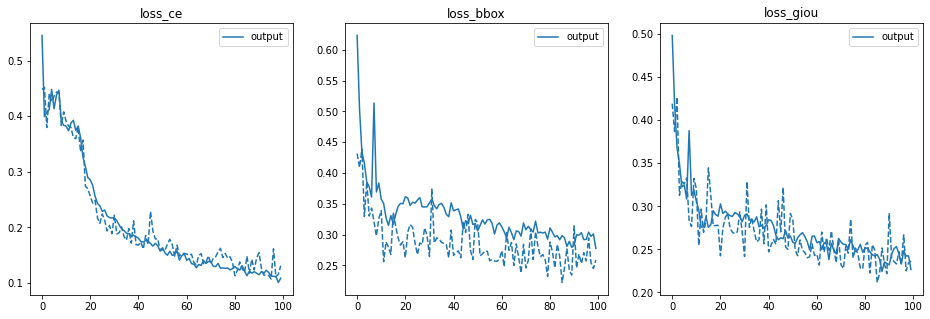

In [35]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

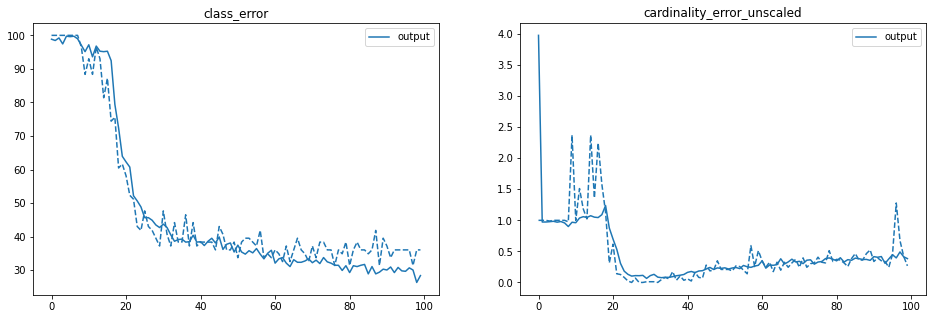

In [36]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   

### Load the fine-tuned model

- How to replace the classification head: https://github.com/facebookresearch/detr/issues/9#issuecomment-636391562

In [37]:
model = torch.hub.load('facebookresearch/detr',
                       'detr_resnet50',
                       pretrained=False,
                       num_classes=num_classes)

checkpoint = torch.load('/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/output/checkpoint.pth',
                        map_location='cpu')

model.load_state_dict(checkpoint['model'],
                      strict=False)

model.eval();

Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip


### Boilerplate functions to display fine-tuned results

In [38]:
def plot_finetuned_results(pil_img, prob=None, boxes=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    if prob is not None and boxes is not None:
      for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=c, linewidth=3))
          cl = p.argmax()
          text = f'{finetuned_classes[cl]}: {p[cl]:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.show()

In [39]:
def run_worflow(my_image, my_model):
  # mean-std normalize the input image (batch-size: 1)
  img = transform(my_image).unsqueeze(0)

  # propagate through the model
  outputs = my_model(img)

  for threshold in [0.9, 0.7]:
    
    probas_to_keep, bboxes_scaled = filter_bboxes_from_outputs(outputs,
                                                              threshold=threshold)

    plot_finetuned_results(my_image,
                           probas_to_keep, 
                           bboxes_scaled)


### With a training image

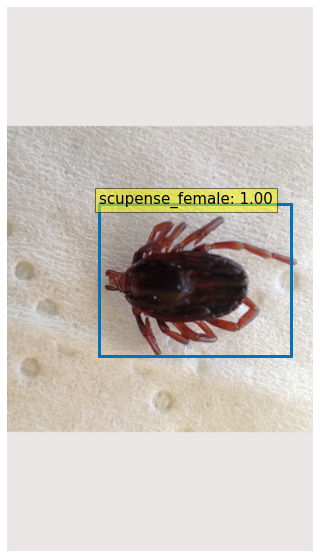

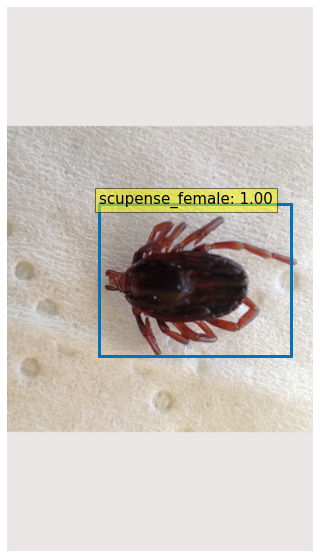

In [40]:
from PIL import Image


img_name = '/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/custom/train2017/0SF_270.jpg'
im = Image.open(img_name)

run_worflow(im,
            model)

### With a validation image

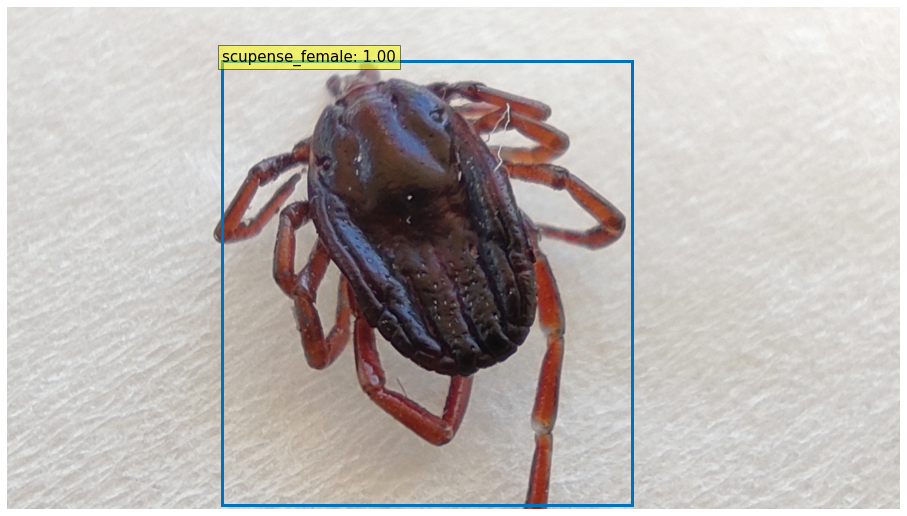

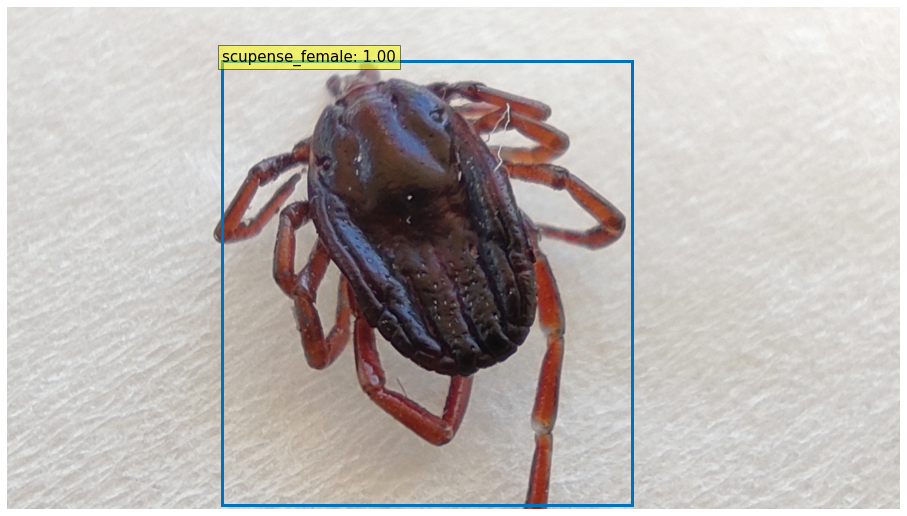

In [44]:
from PIL import Image

img_name = '/content/drive/MyDrive/tick_detr_model_new_tick_data_without_augumentation_11_classes/custom/val2017/SF_val (4).jpg'
im = Image.open(img_name)

run_worflow(im,
            model)